# Load All necessary libraries with iris dataset

In [63]:
import pandas as pd
from sklearn.datasets import load_iris

## save an instance of the loaded iris dataset in the in a variable named iris

In [64]:
iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Use Describe method inorder to findout the statistical measurements of the dataset


In [65]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Check for null values

In [66]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

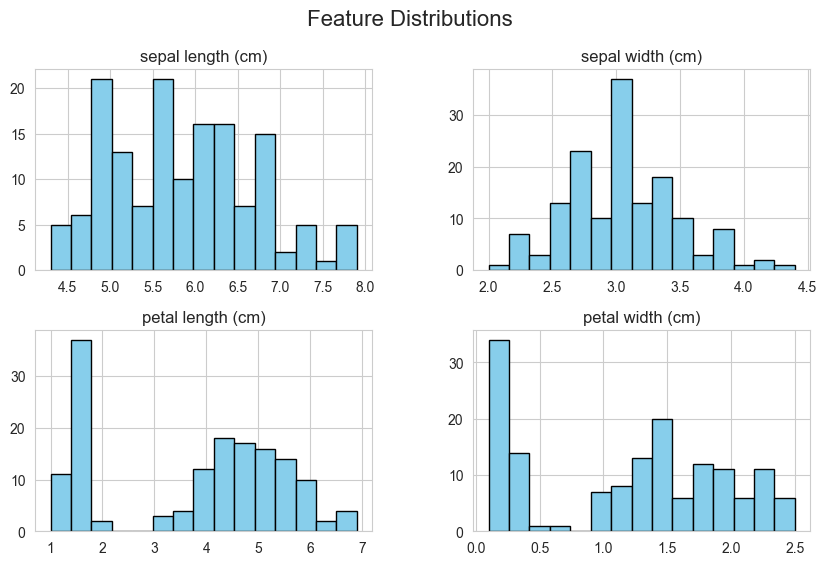

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
df.drop("target",axis=1).hist(figsize=(10, 6), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


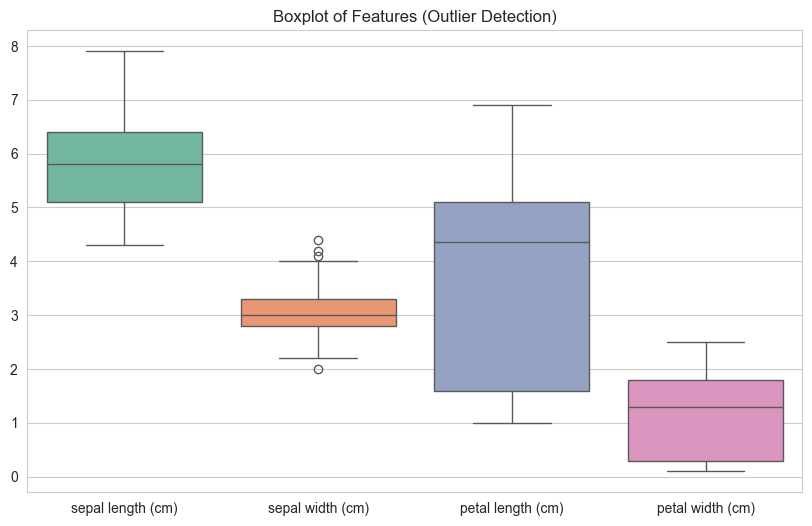

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop('target',axis=1), palette="Set2")
plt.title("Boxplot of Features (Outlier Detection)")
plt.show()

C:\Users\binar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\binar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\binar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\binar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312

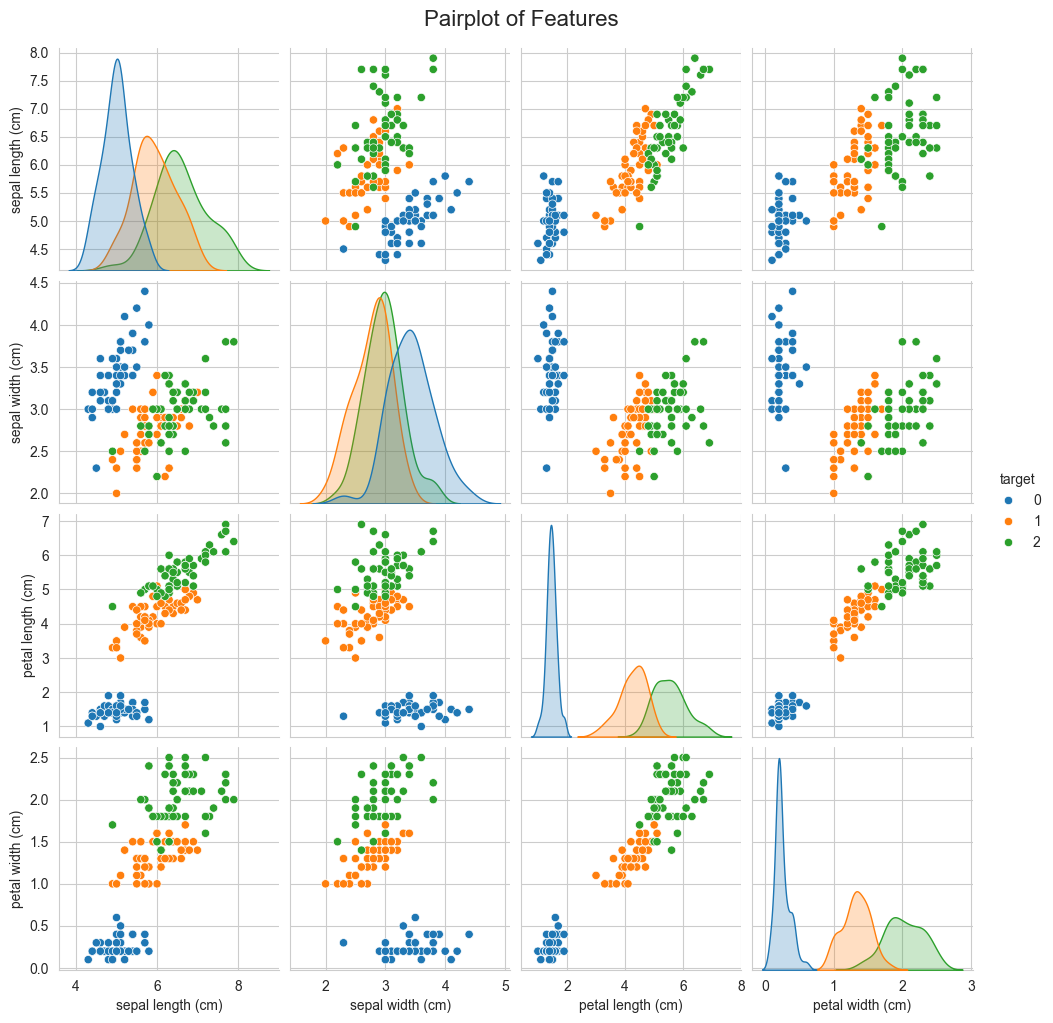

In [69]:
custom_palette = sns.color_palette("tab10")  
sns.pairplot(df, hue="target", palette=custom_palette)
plt.suptitle("Pairplot of Features", y=1.02, fontsize=16)

plt.show()

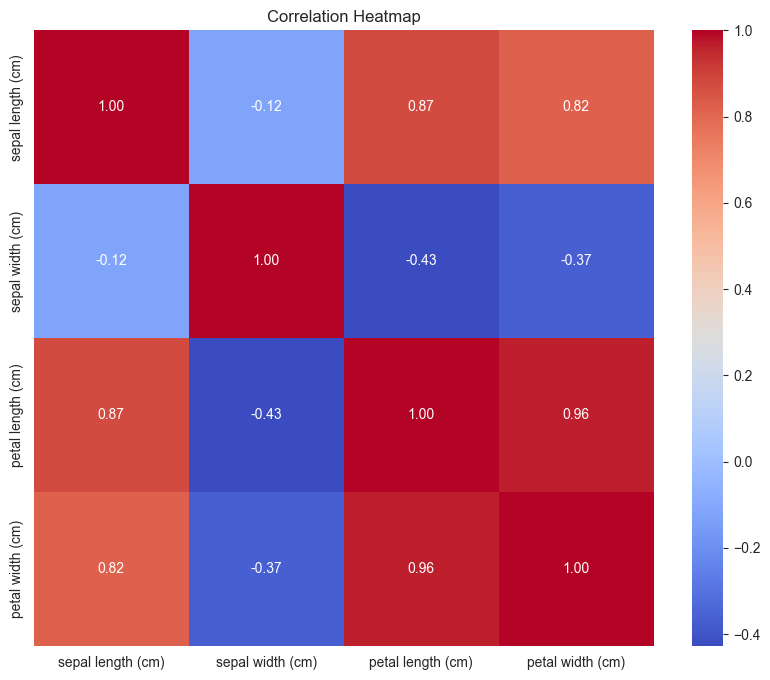

In [70]:
from scipy.stats import pearsonr

correlation_matrix=df.drop("target",axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [71]:
for col in df.columns:
    if col != 'target':
        df.rename(columns={col: col.replace(" (cm)", "")}, inplace=True)

# Outlier handiling

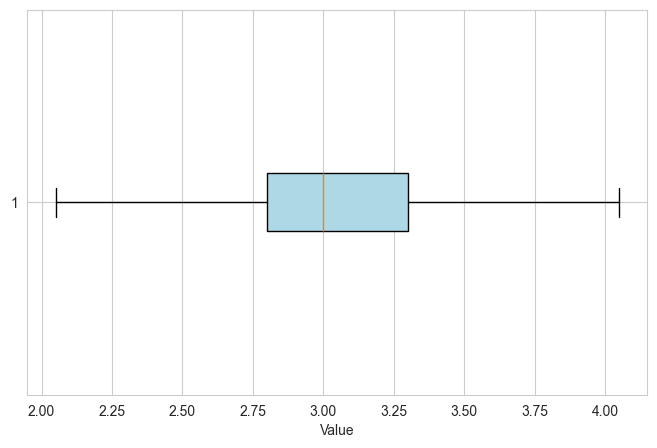

In [72]:
def capping(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


capping('sepal width')

plt.figure(figsize=(8, 5))
plt.boxplot(df['sepal width'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.xlabel("Value")
plt.show()


# Since the correlation between petal width and petal length is 0.96 using PCA on those two features

In [73]:
vals=df['target'].value_counts()
print(vals)

target
0    50
1    50
2    50
Name: count, dtype: int64


In [74]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Scaled_x=scaler.fit_transform(df.drop('target',axis=1))
scaled_df=pd.DataFrame(Scaled_x)
scaled_df.columns=df.drop('target',axis=1).columns
scaled_df.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.051961,-1.340227,-1.315444
1,-1.143017,-0.127367,-1.340227,-1.315444
2,-1.385353,0.344364,-1.397064,-1.315444
3,-1.506521,0.108498,-1.283389,-1.315444
4,-1.021849,1.287827,-1.340227,-1.315444


In [76]:
import pickle
pickle.dump(scaler,open('StandardScaler.pkl','wb'))

In [77]:
from sklearn.decomposition import PCA

X=scaled_df[['petal length','petal width']]
pca=PCA(0.95)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_


In [78]:
explained_variance

array([0.98143272])

In [79]:
pca_col=X_pca
pca_df=pd.DataFrame(data=pca_col,columns=['Petal details'])
final_df=pd.concat([pca_df,df.drop(['petal length','petal width'],axis=1)],axis=1)
final_df.head()

,Petal details,sepal length,sepal width,target
0,-1.877843,5.1,3.5,0
1,-1.877843,4.9,3.0,0
2,-1.918033,4.7,3.2,0
3,-1.837653,4.6,3.1,0
4,-1.877843,5.0,3.6,0


In [80]:
pickle.dump(pca,open('pca.pkl','wb'))

In [81]:

import h2o
from h2o.automl import H2OAutoML

In [87]:
from sklearn.model_selection import train_test_split
h2o.init()
X=final_df.drop('target',axis=1)
y=final_df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


train_df = X_train.copy()
train_df['target'] = y_train
test_df = X_test.copy()
test_df['target'] = y_test

train_h2o = h2o.H2OFrame(train_df)
test_h2o = h2o.H2OFrame(test_df)

target = 'target'            
features = [col for col in train_h2o.columns if col != target]


aml = H2OAutoML(max_models=20, seed=42, max_runtime_secs=600)
aml.train(x=features, y=target, training_frame=train_h2o)

lb = aml.leaderboard
print(lb)

best_model = aml.leader
print('best model is',best_model)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 33 mins
H2O_cluster_timezone:,Asia/Colombo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_binara_wjywbd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.824 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
22:39:08.930: AutoML: XGBoost is not available; skipping it.
22:39:09.38: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 120.0.

██████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     rmse        mse        mae      rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_5_20250329_223908  0.164799  0.0271588  0.0817687  0.0693144                 0.0271588
StackedEnsemble_AllModels_1_AutoML_5_20250329_223908     0.166919  0.0278619  0.0888205  0.0696354                 0.0278619
DeepLearning_grid_2_AutoML_5_20250329_223908_model_2     0.168048  0.0282403  0.100707   0.0813707                 0.0282403


In [103]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier())
]



meta_model = LogisticRegression(max_iter=1000, random_state=42)


stacked_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)


stacked_model.fit(X_train, y_train)


y_pred = stacked_model.predict(X_test)
y_train_pred=stacked_model.predict(X_train)

print(f"Training accuracy: {accuracy_score(y_train,y_train_pred)}")
print(f"Testing accuracy: {accuracy_score(y_test, y_pred)}")


for name, model in base_learners:
    model.fit(X_train, y_train)
    base_accuracy = model.score(X_test, y_test)
    print(f"Accuracy of {name}: {base_accuracy * 100:.2f}%")

print(classification_report(y_test,y_pred))


Training accuracy: 1.0
Testing accuracy: 0.9777777777777777
Accuracy of rf: 97.78%
Accuracy of gb: 97.78%
Accuracy of dt: 97.78%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist_rf = {
    'rf__n_estimators': [10, 50, 100, 150],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10]
}

param_dist_gb = {
    'gb__n_estimators': [10, 50, 100, 150],
    'gb__learning_rate': [0.01, 0.1, 0.5],
    'gb__max_depth': [3, 5, 7]
}

param_dist_dt = {
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__criterion': ['gini', 'entropy']
}

param_dist_meta = {
    'final_estimator__C': [0.01, 0.1, 1, 10],
    'final_estimator__solver': ['lbfgs', 'liblinear']
}


param_dist = {**param_dist_rf, **param_dist_gb, **param_dist_dt, **param_dist_meta}



random_search = RandomizedSearchCV(estimator=stacked_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=3, n_jobs=-1, random_state=42)


random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

best_model = random_search.best_estimator_


y_pred = best_model.predict(X_test)

y_train_pred = best_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'rf__n_estimators': 150, 'rf__min_samples_split': 10, 'rf__max_depth': 10, 'gb__n_estimators': 10, 'gb__max_depth': 3, 'gb__learning_rate': 0.1, 'final_estimator__solver': 'lbfgs', 'final_estimator__C': 0.01, 'dt__min_samples_split': 10, 'dt__min_samples_leaf': 1, 'dt__max_depth': 30, 'dt__criterion': 'entropy'}
Training Accuracy: 0.9714
Testing Accuracy: 0.9778
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [105]:
import joblib
joblib.dump(best_model, 'random_forest_model.joblib')

['random_forest_model.joblib']